In [137]:
!pip install multidict

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import multidict as multidict
from wordcloud import WordCloud

url = 'https://raw.githubusercontent.com/hackforla/data-science/160-survey-repo-labels/labels-survey/output.csv' # GitHub URL to .csv data
plt.rcParams["figure.figsize"] = (24,5.5)


data = pd.read_csv(url)  # Load data from GitHub into pandas
data['ClosedAt']= pd.to_datetime(data['ClosedAt']) # Converting into datetime
data['CreatedAt']= pd.to_datetime(data['CreatedAt']) # Converting into datetime
data['DaysToClosure'] = (data['ClosedAt'] - data['CreatedAt']).dt.days # Converting into datetime
data['DaysToClosure'] = data['DaysToClosure'].replace(0, np.NaN)
data['IssueNbr'] = data['IssueNbr'].astype(str) 
data['UniqueKey'] = data['IssueNbr'] + data['Repository'] + data['Organization'] # Generating a unique id for issues
data['haslabel'] = np.where(data['LabelName'].isnull(), 'Without Label', 'With Label(s)') # Flagging issues with or without labels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Two Research Questions:

**1.- How is the usage of labels in HfLA?**

1a - What percentage of issues are labeled?

1b - How many labels are used?

1c - How many labels are used per project?

1d - What are the most popular ones?

**2.- How does the usage of labels impact the resolution of issues**?

**3.- Cluster analysis**

In [22]:
fig = px.pie(data.groupby('haslabel').UniqueKey.nunique(),values='UniqueKey',names=['Without Label(s)','With Label(s)'], title='Label Usage in HfLA Issues - GitHub')
fig.show()

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9203 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9203 missing from current font.



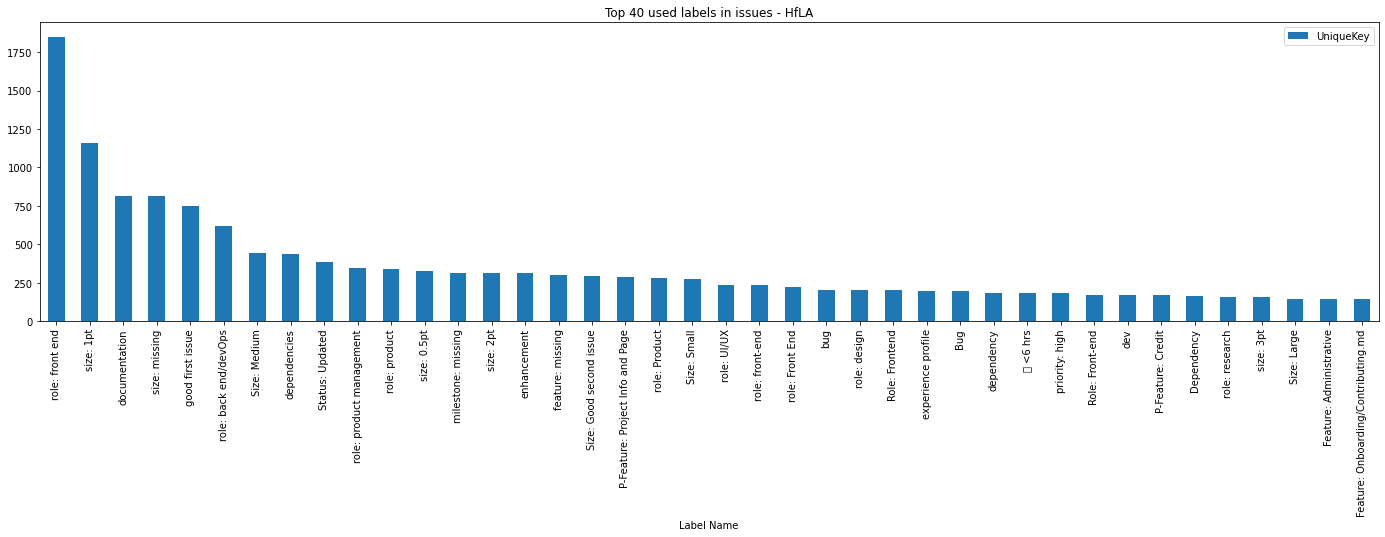

999


In [36]:
labelname_aggr = data.groupby(['LabelName'], as_index=False).UniqueKey.nunique() #Aggregating data by label name and counting # unique issues.
print(labelname_aggr.sort_values('UniqueKey', ascending=False).head(40).plot.bar(x='LabelName'))
plt.title('Top 40 used labels in issues - HfLA',**hfont)
plt.xlabel('Label Name', **hfont)
plt.show()
print(labelname_aggr['LabelName'].count())

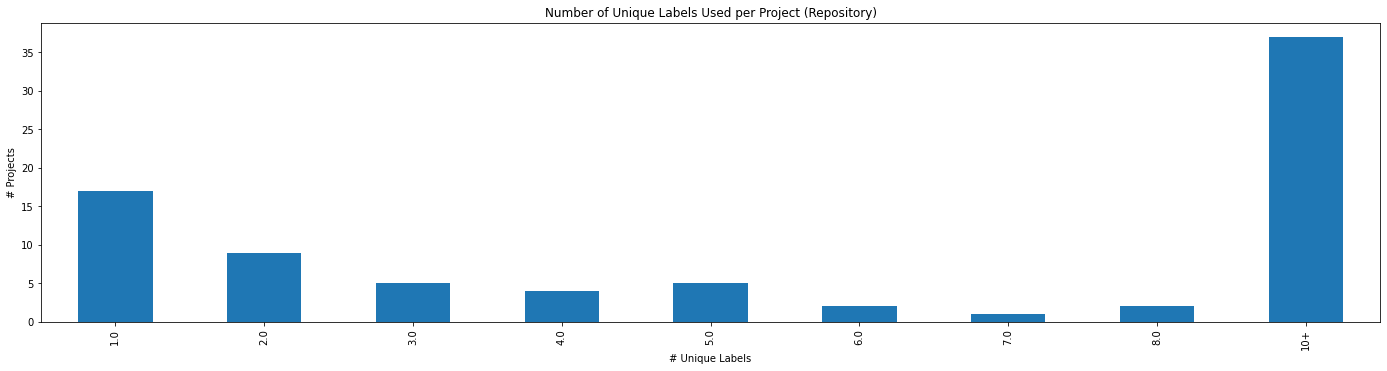

In [139]:


#Grouping data by repository/project and unique labels
repo_aggr2 = data.groupby(['Repository'], as_index=False).nunique() 

# Binning of the data based on a condition
repo_aggr2.loc[repo_aggr2.LabelName == 1, 'Quantity'] = 1
repo_aggr2.loc[repo_aggr2.LabelName == 2, 'Quantity'] = 2
repo_aggr2.loc[repo_aggr2.LabelName == 3, 'Quantity'] = 3
repo_aggr2.loc[repo_aggr2.LabelName == 4, 'Quantity'] = 4
repo_aggr2.loc[repo_aggr2.LabelName == 5, 'Quantity'] = 5
repo_aggr2.loc[repo_aggr2.LabelName == 6, 'Quantity'] = 6
repo_aggr2.loc[repo_aggr2.LabelName == 7, 'Quantity'] = 7
repo_aggr2.loc[repo_aggr2.LabelName == 8, 'Quantity'] = 8
repo_aggr2.loc[repo_aggr2.LabelName == 9, 'Quantity'] = 9
repo_aggr2.loc[repo_aggr2.LabelName >= 10, 'Quantity'] = '10+'

#Grouping data on each bin and counting the number of repositories per bin
repo_aggr3 = repo_aggr2.groupby('Quantity').count()

#Plotting
repo_aggr3['Repository'].plot.bar(x='Repository')
plt.title('Number of Unique Labels Used per Project (Repository)',**hfont)
plt.xlabel('# Unique Labels', **hfont)
plt.ylabel('# Projects', **hfont)
plt.show()


In [130]:
df = data.groupby('Repository') \
       .agg({'LabelName':'nunique', 'DaysToClosure':'mean'}) \
       .rename(columns={'LabelName':'count','DaysToClosure':'mean_days_closure'}) \
       .reset_index()
df

,Repository,count,mean_days_closure
0,.github,1,1.000000
1,.github-automations,1,35.600000
2,311-data,70,108.118337
3,311-report,2,23.000000
4,Architecture,0,NaN
...,...,...,...
112,undebate,0,NaN
113,website,114,51.051878
114,website-redesign,2,97.720000
115,workshop-wednesdays,2,NaN


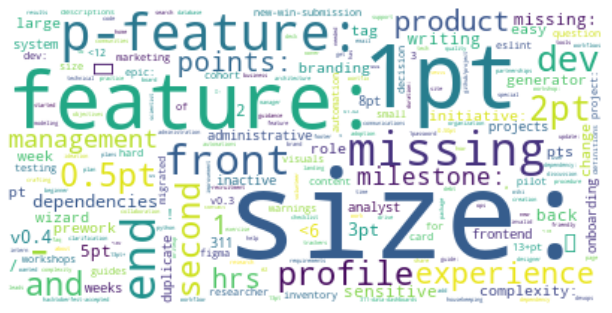

In [138]:
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

def makeImage(text):
    #alice_mask = np.array(Image.open("alice_mask.png"))

    wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()



l = data['LabelName'][data['LabelName'].notnull()]
#print(l)
l = [' '.join(l)]

makeImage(getFrequencyDictForText(str(l)))